In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('eur_cop.csv')
df.head()

,Date,Price,Open,High,Low,Change %
0,"Oct 08, 2021","4,355.00","4,360.50","4,372.50","4,345.50",-0.05%
1,"Oct 07, 2021","4,357.00","4,377.50","4,383.50","4,350.00",-0.41%
2,"Oct 06, 2021","4,375.00","4,390.00","4,398.50","4,359.50",-0.21%
3,"Oct 05, 2021","4,384.00","4,405.00","4,414.00","4,386.00",-0.39%
4,"Oct 04, 2021","4,401.00","4,395.00","4,416.50","4,391.00",0.23%


In [ ]:
df_copy = df.copy()
df_copy.describe()

,Date,Price,Open,High,Low,Change %
count,3071,3071,3071,3071,3071,3071
unique,3071,1886,1706,1924,1704,435
top,"Oct 18, 2016","2,550.50","2,559.00","2,615.50","2,551.00",-0.02%
freq,1,8,10,6,12,36


In [ ]:
df_copy.Date = pd.to_datetime(df_copy.Date, dayfirst= True)
df_copy = df_copy.sort_values(['Date'])
df.head()

,Date,Price,Open,High,Low,Change %
0,"Oct 08, 2021","4,355.00","4,360.50","4,372.50","4,345.50",-0.05%
1,"Oct 07, 2021","4,357.00","4,377.50","4,383.50","4,350.00",-0.41%
2,"Oct 06, 2021","4,375.00","4,390.00","4,398.50","4,359.50",-0.21%
3,"Oct 05, 2021","4,384.00","4,405.00","4,414.00","4,386.00",-0.39%
4,"Oct 04, 2021","4,401.00","4,395.00","4,416.50","4,391.00",0.23%


In [ ]:
df_copy.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    3071
unique                   3071
top       2016-11-14 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2021-10-08 00:00:00
Name: Date, dtype: object

In [ ]:
df_copy.isna().sum()
df_copy.set_index("Date",inplace= True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3071 entries, 2010-01-01 to 2021-10-08
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3071 non-null   object
 1   Open      3071 non-null   object
 2   High      3071 non-null   object
 3   Low       3071 non-null   object
 4   Change %  3071 non-null   object
dtypes: object(5)
memory usage: 144.0+ KB


In [ ]:
df_copy.tail(20)

,Price,Open,High,Low,Change %
Date,,,,,
2021-09-13,"4,520.00","4,530.50","4,537.00","4,504.50",-0.18%
2021-09-14,"4,518.00","4,524.50","4,538.00","4,516.00",-0.04%
2021-09-15,"4,505.00","4,522.50","4,535.50","4,495.50",-0.29%
2021-09-16,"4,488.00","4,507.50","4,512.00","4,470.50",-0.38%
2021-09-17,"4,485.00","4,489.50","4,509.00","4,476.50",-0.07%
2021-09-20,"4,504.00","4,490.50","4,527.50","4,475.50",0.42%
2021-09-21,"4,496.00","4,507.50","4,517.50","4,497.50",-0.18%
2021-09-22,"4,476.00","4,499.50","4,508.50","4,479.50",-0.44%
2021-09-23,"4,497.00","4,479.50","4,512.50","4,478.00",0.47%


In [ ]:
df_copy = df_copy.asfreq('b')
df_copy.isna().sum()

Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [ ]:
df_copy['Price'] = df_copy['Price'].str.replace(',', '', regex = True).astype(float)

In [ ]:
df_copy.Price.describe()

count    3071.000000
mean     3150.644904
std       670.747089
min      2157.000000
25%      2560.000000
50%      3148.000000
75%      3572.750000
max      4687.000000
Name: Price, dtype: float64

[]

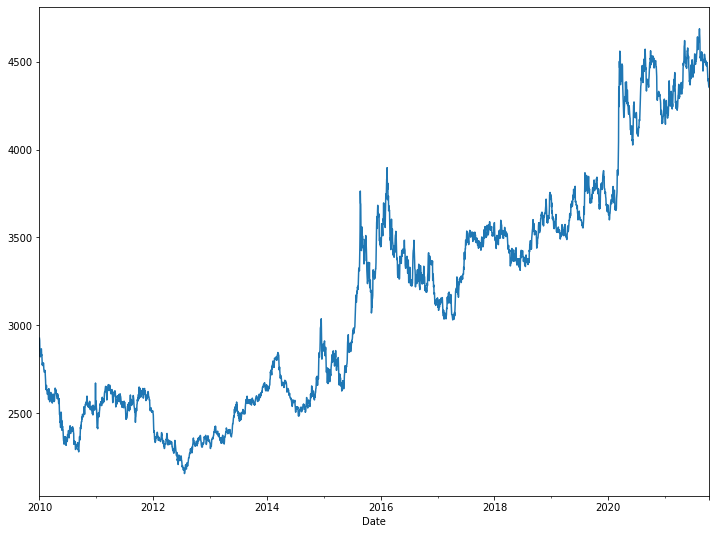

In [ ]:
df_copy.Price.plot(figsize = (12,9))
plt.plot()

In [ ]:
#Comprobando estacionaridad, para este caso tenemos que no son estacionarios nuestros datos
import statsmodels.tsa.stattools as sts 
sts.adfuller(df_copy.Price)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-0.518700389987013,
 0.8883152906897551,
 2,
 3068,
 {'1%': -3.432483239816103,
  '10%': -2.5672717325880647,
  '5%': -2.862482530738596},
 28883.681201771353)

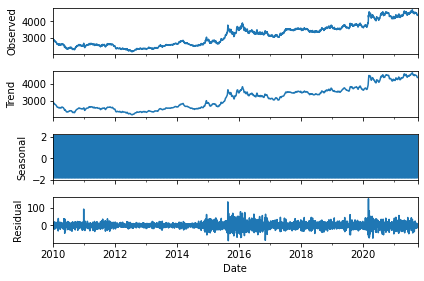

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df_copy['Price'], model = 'additive')
resultado.plot();
#Comprobando la estacionalidad, para este caso no hay un patron ciclico así que no hay estacionalidad

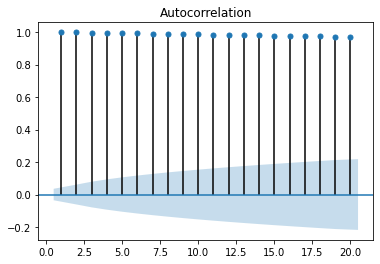

In [ ]:
#Calculando las autocorrelaciones para ver que tan atras podemos llevar el precio
#NOTA: como todos los puntos se ubican superiores a 0 la correlación es positiva 
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_copy.Price, lags = 20, zero = False)
plt.show();

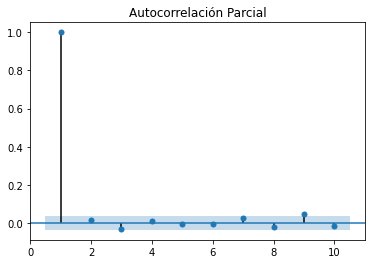

In [ ]:
#PACF autocorrelaciones parciales
#NOTA: Para este caso parece ser que solo se puede tomar 1 día de retraso pues los valores siguientes disminuyen totalmente la autocorrelación
sgt.plot_pacf(df_copy.Price, lags = 10, zero = False, title = "Autocorrelación Parcial", method = ('ols'));

In [21]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle, gdp_trend = hpfilter(df_copy['Price'], lamb = 1600)

In [22]:
df_copy['trend'] = gdp_trend
df_copy.head()

,Price,Open,High,Low,Change %,trend
Date,,,,,,
2010-01-01,2927.0,"2,922.00","2,927.00","2,921.00",0.07%,2893.764498
2010-01-04,2915.0,"2,929.00","2,961.00","2,890.00",-0.41%,2886.509241
2010-01-05,2857.0,"2,910.00","2,931.00","2,850.00",-1.99%,2879.274756
2010-01-06,2843.0,"2,851.00","2,856.00","2,819.00",-0.49%,2872.099622
2010-01-07,2821.0,"2,842.00","2,850.00","2,810.00",-0.77%,2865.008497


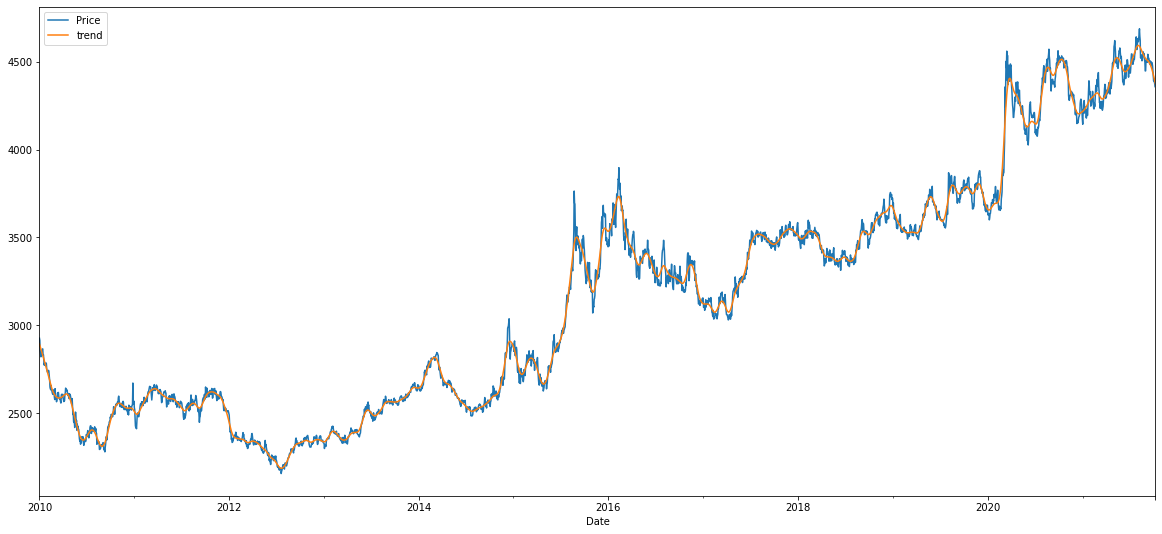

In [26]:
df_copy[['Price', 'trend']].plot(figsize = (20,9))
plt.show()